# TEST CODE - not complete

### k-means clustering

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [ ]:
df_unique.columns

Index(['search_log_session_id', 'search_log_id', 'session_id',
       'search_log_room_id', 'uuid', 'utc_datetime', 'utm_source',
       'utm_medium', 'utm_campaign', 'lang_code', 'currency', 'arrival',
       'departure', 'nights', 'adults', 'children', 'if_children',
       'children_age_mean', 'conversion', 'sel_num_of_rooms',
       'mean_room_price', 'total_price_p_night', 'picked_room', 'baby_bed',
       'pieces', 'sum_price', 'total_price_final', 'rooms_total_price',
       'upsell_total_price', 'vouchers_total_price', 'loyalty_discount_total',
       'redeemed_loyalty_points_total', 'hotel_id', 'rfm_monetary_score',
       'rfm_duration_score', '0_age', '1_age', '2_age', '3_age', '4_age',
       'ROOMAA_room_price_min', 'offered_price_median', 'offered_price_min',
       'offered_price_max', 'ROOMAA_room_price_max', 'ROOMBB_room_price_min',
       'ROOMBB_room_price_max', 'ROOMCC_room_price_min',
       'ROOMCC_room_price_max', 'ROOMDD_room_price_min',
       'ROOMDD_room_pric

In [ ]:
X = df_unique[['sel_num_of_rooms','if_children','nights','adults','children','children_age_mean','conversion','total_price_p_night','upsell_total_price','lead_time']].fillna(value=0)

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# preprocessing: one hot encoding currency, pca?

In [ ]:
km_inertias, km_scores = [], []

for k in range(2, 8):
    km = KMeans(n_clusters=k).fit(X_scaled)
    km_inertias.append(km.inertia_)
    km_scores.append(silhouette_score(X_scaled, km.labels_))

KeyboardInterrupt: 

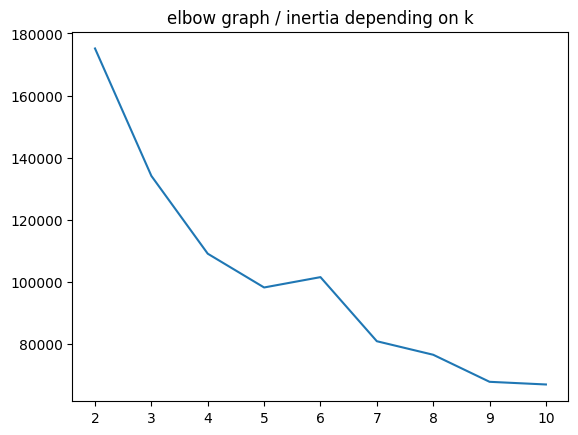

In [ ]:
sns.lineplot(x=range(2, 8), y=km_inertias)
plt.title('elbow graph / inertia depending on k')
plt.show()

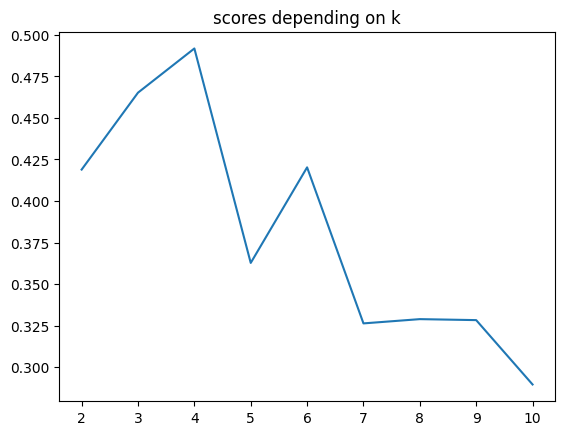

In [ ]:
sns.lineplot(x=range(2, 8), y=km_scores)
plt.title('scores depending on k')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=42)  # Adjust n_clusters based on your analysis
df_unique['cluster'] = kmeans.fit_predict(X_scaled)

In [ ]:
km = KMeans(n_clusters=4).fit(X_scaled)

In [ ]:
print("silhouette_score is :",silhouette_score(X_scaled, kmeans.labels_, metric='euclidean'))

silhouette_score is : 0.4918115866952646


In [ ]:
X.columns

Index(['sel_num_of_rooms', 'if_children', 'nights', 'adults', 'children',
       'children_age_mean', 'conversion', 'total_price_p_night',
       'upsell_total_price', 'lead_time'],
      dtype='object')

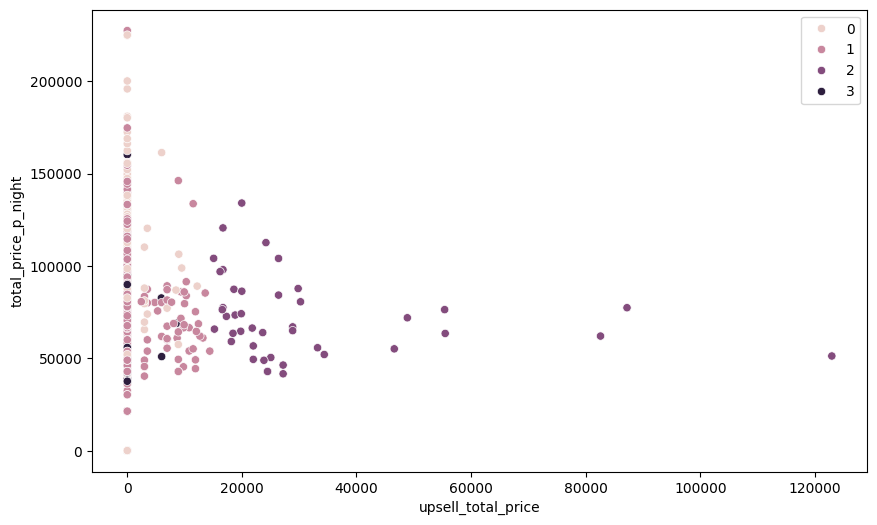

In [ ]:
# K-Means visualization on pair of 2 features
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X.iloc[:, 8], y=X.iloc[:, 7], hue=km.labels_)
plt.show()

In [ ]:
cluster_analysis = df_unique.groupby('cluster')[['sel_num_of_rooms','if_children','nights','adults','children','children_age_mean','conversion','total_price_p_night','upsell_total_price','lead_time']].mean()
cluster_analysis

,sel_num_of_rooms,if_children,nights,adults,children,children_age_mean,conversion,total_price_p_night,upsell_total_price,lead_time
cluster,,,,,,,,,,
0,1.056518,1.000000,2.508296,2.003855,1.575499,7.920679,0.000000,NaN,NaN,46.397520
1,2.270638,0.388085,2.481702,4.291064,0.767660,7.671528,0.039149,62408.192705,733.695652,55.834043
2,1.092939,0.250000,2.522334,2.144092,0.389049,7.878205,1.000000,73615.192391,1286.661562,52.997839
3,1.002926,0.000000,2.401102,2.012315,0.000000,NaN,0.000000,NaN,NaN,41.584745


In [ ]:
df_unique['cluster'].value_counts()

cluster
3    14697
0     5967
2     1388
1     1175
Name: count, dtype: int64

In [ ]:
df_unique.columns

Index(['search_log_session_id', 'search_log_id', 'session_id',
       'search_log_room_id', 'uuid', 'utc_datetime', 'utm_source',
       'utm_medium', 'utm_campaign', 'lang_code', 'currency', 'arrival',
       'departure', 'nights', 'adults', 'children', 'if_children',
       'children_age_mean', 'conversion', 'sel_num_of_rooms',
       'mean_room_price', 'total_price_p_night', 'picked_room', 'baby_bed',
       'pieces', 'sum_price', 'total_price_final', 'rooms_total_price',
       'upsell_total_price', 'vouchers_total_price', 'loyalty_discount_total',
       'redeemed_loyalty_points_total', 'hotel_id', 'rfm_monetary_score',
       'rfm_duration_score', '0_age', '1_age', '2_age', '3_age', '4_age',
       'ROOMAA_room_price_min', 'offered_price_median', 'offered_price_min',
       'offered_price_max', 'ROOMAA_room_price_max', 'ROOMBB_room_price_min',
       'ROOMBB_room_price_max', 'ROOMCC_room_price_min',
       'ROOMCC_room_price_max', 'ROOMDD_room_price_min',
       'ROOMDD_room_pric

In [ ]:
for k in range(4):
    print(f'cluster nb : {k}')
    print(df_unique[df_unique['cluster'] == k][['nights','adults','children','if_children','children_age_mean','conversion','sel_num_of_rooms','total_price_p_night','upsell_total_price','offered_price_median']].describe())#.iloc[[0, 1, 3, 7], :-1])
    print('\n\n')

cluster nb : 0
            nights       adults     children  if_children  children_age_mean  \
count  5967.000000  5967.000000  5967.000000       5967.0        5919.000000   
mean      2.508296     2.003855     1.575499          1.0           7.920679   
std       1.000447     0.403411     0.657066          0.0           4.406163   
min       0.000000     1.000000     1.000000          1.0           0.000000   
25%       2.000000     2.000000     1.000000          1.0           4.000000   
50%       2.000000     2.000000     1.000000          1.0           8.000000   
75%       3.000000     2.000000     2.000000          1.0          11.000000   
max       9.000000     6.000000     6.000000          1.0          17.000000   

       conversion  sel_num_of_rooms  total_price_p_night  upsell_total_price  \
count      5967.0       5945.000000                  0.0                 0.0   
mean          0.0          1.056518                  NaN                 NaN   
std           0.0       

In [ ]:
df_unique[df_unique['cluster'] == 2][['nights','adults','children','if_children','children_age_mean','conversion','sel_num_of_rooms','total_price_p_night','upsell_total_price','offered_price_median']].describe()

,nights,adults,children,if_children,children_age_mean,conversion,sel_num_of_rooms,total_price_p_night,upsell_total_price,offered_price_median
count,1388.000000,1388.000000,1388.000000,1388.000000,338.000000,1388.0,1388.000000,1388.000000,1388.000000,1388.000000
mean,2.522334,2.144092,0.389049,0.250000,7.878205,1.0,1.092939,73615.192391,1286.661562,86848.255681
std,0.999750,0.626949,0.747943,0.433169,4.838391,0.0,0.292924,28507.724564,6619.152331,30737.892351
min,1.000000,1.000000,0.000000,0.000000,0.000000,1.0,1.000000,21345.000000,0.000000,10672.500000
25%,2.000000,2.000000,0.000000,0.000000,4.000000,1.0,1.000000,52644.725000,0.000000,68844.375000
50%,2.000000,2.000000,0.000000,0.000000,7.500000,1.0,1.000000,67239.445000,0.000000,84463.638340
75%,3.000000,2.000000,0.250000,0.250000,12.000000,1.0,1.000000,87852.352119,0.000000,102380.570283
max,7.000000,5.000000,4.000000,1.000000,17.000000,1.0,3.000000,227410.160000,122960.175800,237099.000000
